In [14]:
from tqdm import tqdm
import easyocr
import os
import cv2
import matplotlib.pyplot as plt

In [15]:
list_path=os.listdir(r"ttb")
list_path=["ttb/"+i for i in list_path]
list_path

['ttb/LINE_ALBUM_slip_230227_165.jpg',
 'ttb/LINE_ALBUM_slip_230227_31.jpg',
 'ttb/LINE_ALBUM_slip_230227_325.jpg',
 'ttb/LINE_ALBUM_slip_230227_326.jpg',
 'ttb/LINE_ALBUM_slip_230227_369.jpg',
 'ttb/LINE_ALBUM_slip_230227_418.jpg',
 'ttb/LINE_ALBUM_slip_230227_9_0.jpg']

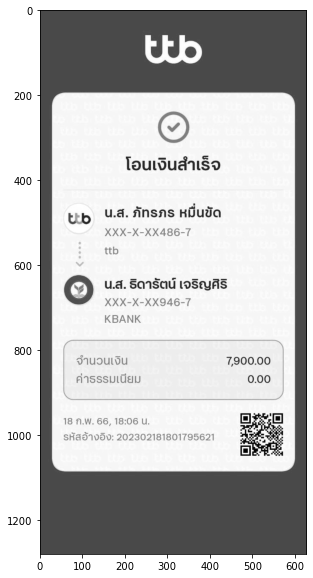

In [37]:
img = cv2.imread(list_path[0], 0)

# Apply Otsu's thresholding to the image
# ret, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the thresholded image using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(img, cmap='gray')

# Show the plot
plt.show()

In [35]:
img = cv2.imread(list_path[6])

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Initialize the OCR reader
reader = easyocr.Reader(['en'])

# Perform OCR on the image
ls = reader.readtext(gray, detail=0, paragraph=False)
ls

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['tb',
 '[oulbuani:',
 'tb',
 'u.a.',
 'uaylau Uonov',
 'XXX-X-XX535-5',
 '',
 'ttb',
 'u.a:',
 'Sansau (oSayas',
 'XXX-X-XX946-7',
 'KBANK',
 'jquoulju',
 '380.00',
 'AJsSSUlau',
 "'  0.00",
 '19 a.W: 66, 08.47 u.',
 'SHasioap: 202302190800343449',
 '']

In [38]:
#Test the bank slip logical
list_path=os.listdir(r"ttb")
list_path=["ttb/"+i for i in list_path]
list_path

reader = easyocr.Reader(['en'])
 # Length of the pattern to match
check_list = []
img_list = []
for i in tqdm(range(0,len(list_path))):
    img = cv2.imread(list_path[i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ls = reader.readtext(gray, detail=0, paragraph=False)

    if sum(1 for w in ls if 'tb' in w) >= 3 and sum(1 for w in ls if 'xxx-x-xx' in w.lower()) >= 1:
        check_list.append("1")
    else:
        check_list.append("0")
    img_list.append(ls)



CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
100%|██████████| 7/7 [02:08<00:00, 18.32s/it]


In [39]:
check_list

['1', '1', '1', '1', '1', '0', '1']

In [33]:
#Check with all bank slip
Bank_list = ['baac','bbk','kbank','krungsri','krungthai','memo','scb','ttb']

for i in Bank_list:
    list_path = os.listdir(i)
    list_path = [os.path.join(i, j) for j in list_path]
    reader = easyocr.Reader(['en'])

    check_list = []
    img_list = []

    for k in tqdm(range(0,7)):
        img = cv2.imread(list_path[k])
        if img is not None:  # check if image was loaded correctly
            # Convert the image to grayscale
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            ls = reader.readtext(gray, detail=0, paragraph=False)
            if sum(1 for w in ls if 'tb' in w) >= 3 and sum(1 for w in ls if 'xxx-x-xx' in w.lower()) >= 1:
                check_list.append("1")
            else:
                check_list.append("0")
            img_list.append(ls)
        else:
            print(f"Error loading image: {list_path[k]}")
    print(f'check_list_{i}' , check_list)


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
100%|██████████| 7/7 [00:40<00:00,  5.85s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_baac ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [01:03<00:00,  9.10s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_bbk ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [00:54<00:00,  7.77s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_kbank ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [01:13<00:00, 10.44s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_krungsri ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [00:50<00:00,  7.19s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_krungthai ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [01:26<00:00, 12.29s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_memo ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [01:17<00:00, 11.01s/it]
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


check_list_scb ['0', '0', '0', '0', '0', '0', '0']


100%|██████████| 7/7 [01:32<00:00, 13.23s/it]

check_list_ttb ['1', '1', '1', '1', '1', '0', '1']
